#### Name: Garvit Joshi

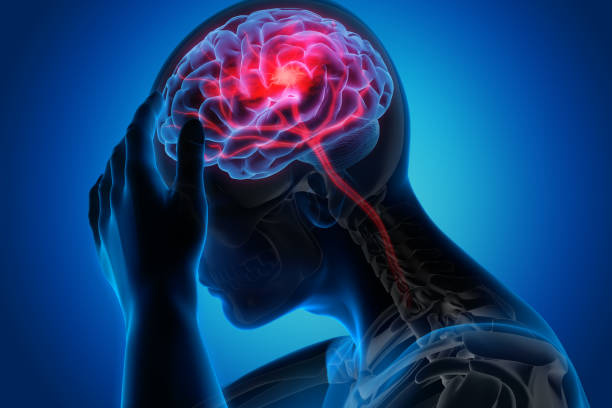

## Why Brain Stroke Prediction?

According to PubMed, the most common causes of death after a stroke are:

1. **Cerebrovascular Disease**
   - The leading cause of death within the first week after a stroke, accounting for 90% of deaths.

2. **Pulmonary Embolism**
   - The second leading cause of death within the second to fourth week after a stroke, accounting for 30% of deaths.

3. **Bronchopneumonia**
   - The third leading cause of death within the second and third months after a stroke, accounting for 27% of deaths.

4. **Cardiac Disease**
   - The fourth leading cause of death after a stroke, accounting for 37% of deaths, and usually occurs more than three months after the stroke.

- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

### 1 IMPORTING LIBRARIES

- Library pandas will be required to work with data in tabular representation.
- Library numpy will be required to round the data in the correlation matrix.
- Library matplotlib, seaborn, plotly required for data visualization

In [1]:
import numpy as np  
# NumPy is imported for numerical operations and array manipulations, commonly used for data processing and scientific computing.
import pandas as pd  
# Pandas is imported for data manipulation and analysis, particularly for handling structured data in tabular form (dataframes).
import matplotlib.pyplot as plt  
# Matplotlib is imported for creating static, interactive, and animated visualizations in Python.
import seaborn as sns  
# Seaborn is imported for statistical data visualization, providing a high-level interface for drawing attractive and informative statistical graphics.

### 2 DATA DESCRIPTION AND DATA CLEANING

- In this block, exploratory data analysis will be carried out, data types, missing values, duplicates and also the relationship between variables will be described.

In [2]:
df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
df = df_stroke.copy() #Copy the dataset 
df.head() #Loading the First Five Rows:

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


| Attribute         | Description                                                                                   |
|-------------------|-----------------------------------------------------------------------------------------------|
| id                | Unique identifier                                                                             |
| gender            | "Male", "Female" or "Other"                                                                  |
| age               | Age of the patient                                                                            |
| hypertension      | 0 if the patient doesn't have hypertension, 1 if the patient has hypertension                |
| heart_disease     | 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease       |
| ever_married      | "No" or "Yes"                                                                                 |
| work_type         | "Children", "Govt_job", "Never_worked", "Private" or "Self-employed"                          |
| Residence_type    | "Rural" or "Urban"                                                                           |
| avg_glucose_level | Average glucose level in blood                                                               |
| bmi               | Body mass index                                                                               |
| smoking_status    | "Formerly smoked", "Never smoked", "Smokes" or "Unknown"*                                      |
| stroke            | 1 if the patient had a stroke or 0 if not                                                    |


#### 2.2 Describe Data

In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
df.describe().T
# T is for transpose the matrix

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


`` No use of id part in predicting the data models.``

In [5]:
df.drop(['id'],axis=1 ,inplace = True)

#### 2.3 Null Value in data

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

``BMI has null values in large number and we need to fill these using mean values.``

In [7]:
df["bmi"].fillna(df['bmi'].mean(),inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\1809077115.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bmi"].fillna(df['bmi'].mean(),inplace=True)


`` Replacing the value of others with Males to work under 2 Categories only``

In [8]:
df["gender"] = df["gender"].replace(["Other"],"Male")

In [9]:
df["gender"].nunique()

2

### 3. Visualize or find relations in Data Points

Text(0.5, 1.0, 'Work Types')

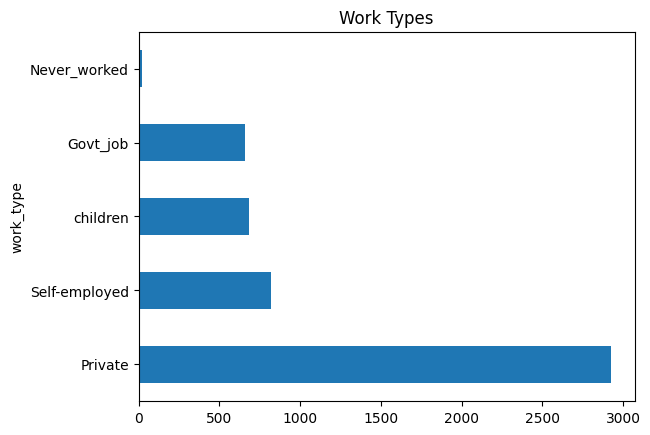

In [10]:
(df["work_type"]
.value_counts()
.plot.barh()
.set_title("Work Types"))

`` Highest Category of peoples are Private job-sector working.``

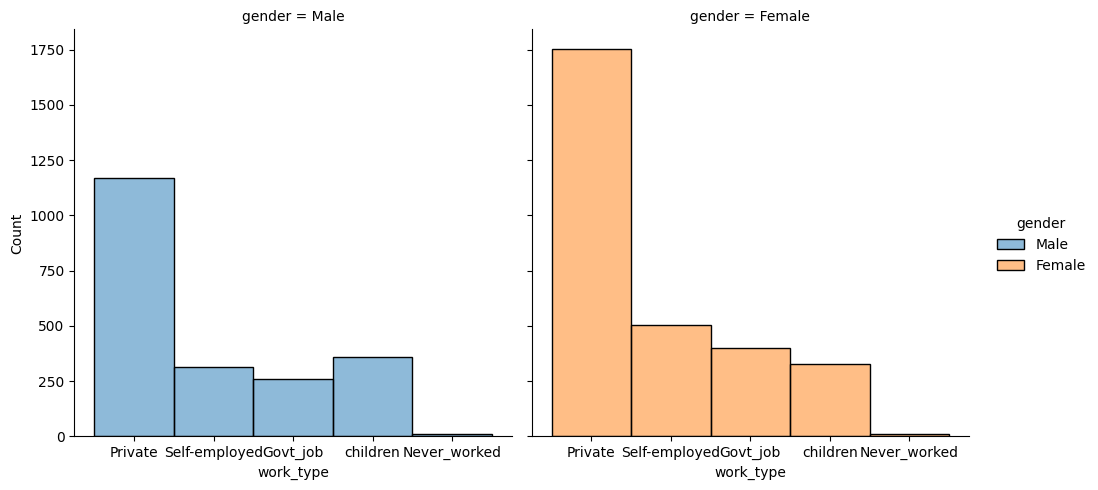

In [11]:
sns.displot(df, x = "work_type",hue = "gender",col= "gender",shrink = 1)

``Among both gender in Private Females are more as compared to males in Private Sector Work.``

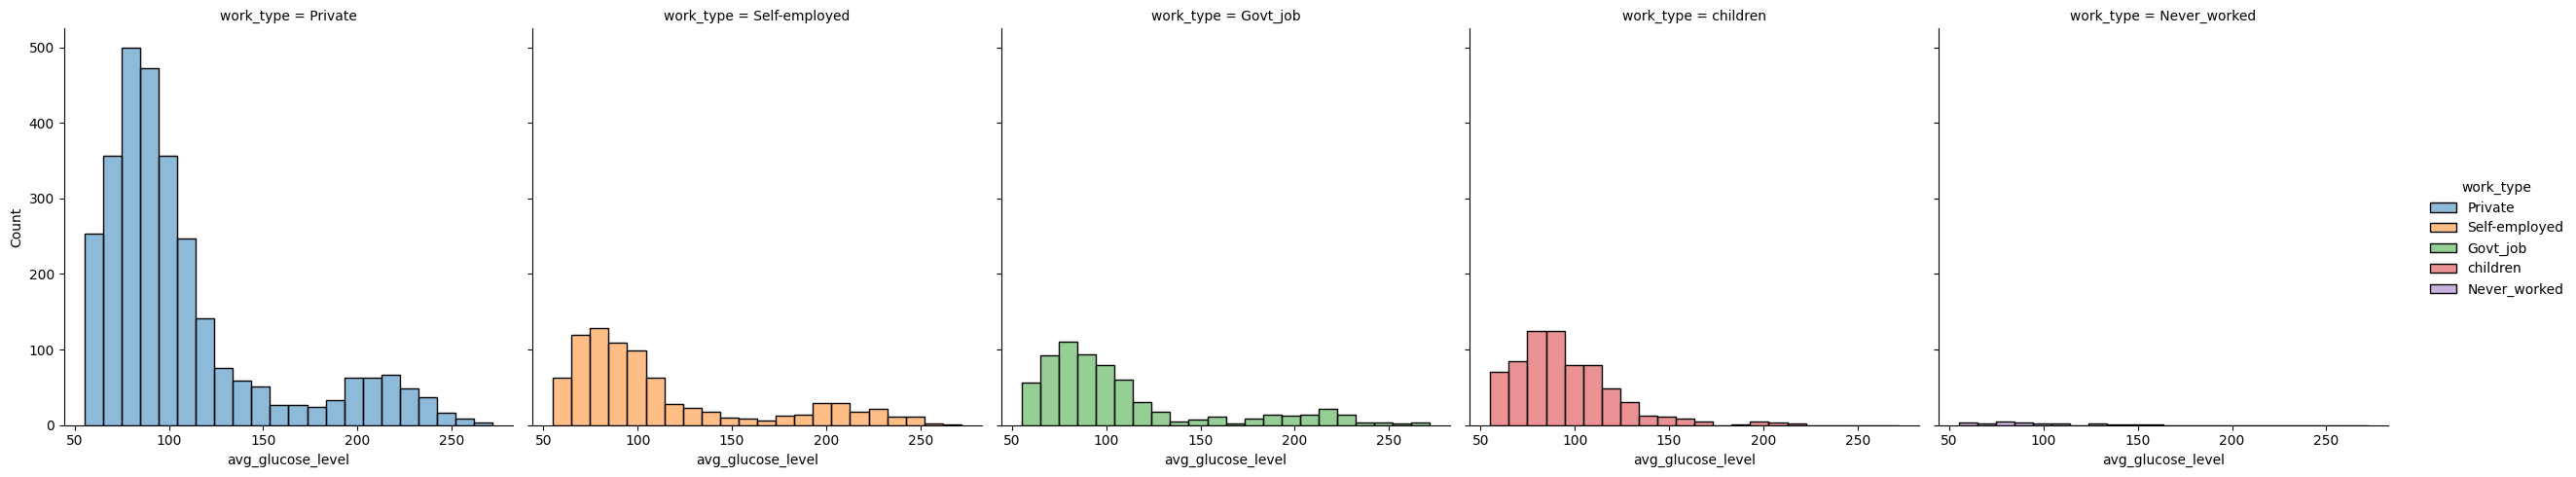

In [12]:
sns.displot(df, x = "avg_glucose_level",hue = "work_type",col= "work_type",binwidth=10)

In [13]:
from matplotlib.gridspec import GridSpec

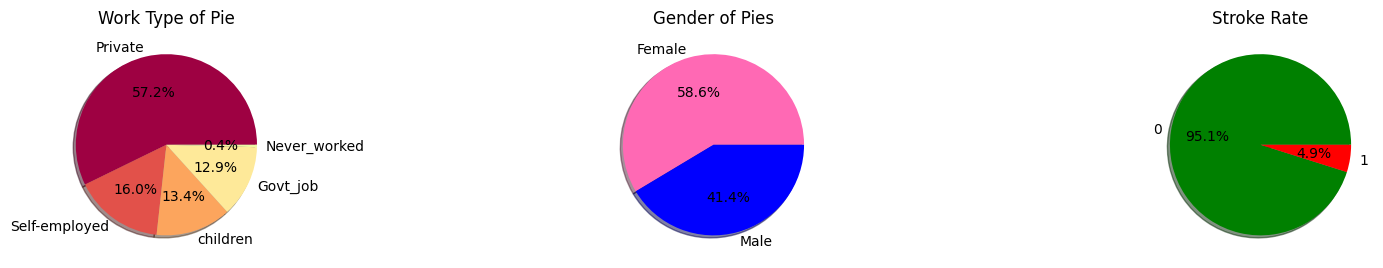

In [14]:
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(3, 3)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
gender_colors = ["hotpink","b"]
stroke_colors = ["g","r"]

label_hyper = df['work_type'].value_counts().index
hyper_values = df['work_type'].value_counts()
plt.subplot(the_grid[0, 0], aspect=1, title='Work Type of Pie')
hyper_pie = plt.pie(hyper_values, labels=label_hyper, autopct='%1.1f%%', shadow=True,colors=colors)


label_gender = df['gender'].value_counts().index
gender_values = df['gender'].value_counts()
plt.subplot(the_grid[0, 1], aspect=1, title='Gender of Pies')
gender_pie = plt.pie(gender_values, labels=label_gender, autopct='%1.1f%%', shadow=True,colors=gender_colors)



label_stroke = df['stroke'].value_counts().index
stroke_values = df['stroke'].value_counts()
plt.subplot(the_grid[0, 2], aspect=1, title='Stroke Rate')
hyper_pie = plt.pie(stroke_values, labels=label_stroke, autopct='%1.1f%%', shadow=True,colors=stroke_colors)

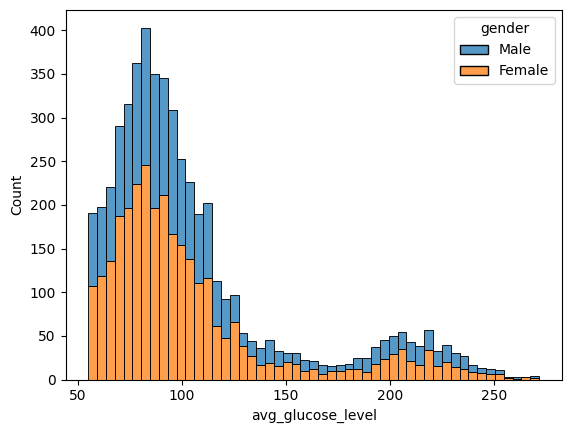

In [15]:
sns.histplot(data=df, x="avg_glucose_level", hue="gender", multiple="stack");

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\177483751.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.stroke==1],x='age',hue = "stroke", shade=True,ax = ax1 ,color='lightcoral',alpha=1)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\177483751.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.stroke==0],x='age',shade=True,ax = ax1,color='palegreen',alpha=0.5)


<Axes: xlabel='age', ylabel='Density'>

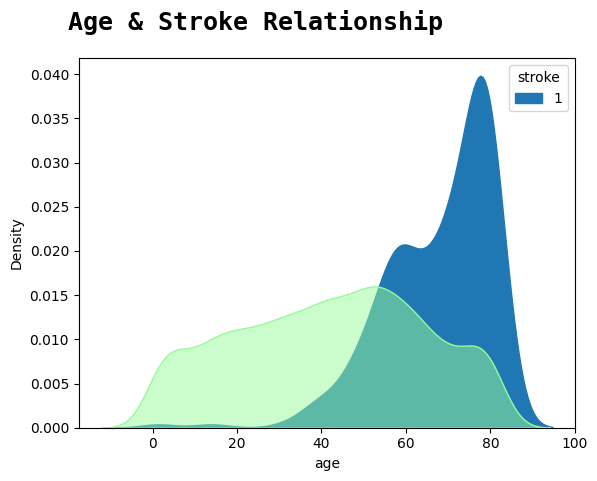

In [16]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.text(-20,0.045,'Age & Stroke Relationship',fontsize=18,fontweight='bold', fontfamily='monospace')
sns.kdeplot(data=df[df.stroke==1],x='age',hue = "stroke", shade=True,ax = ax1 ,color='lightcoral',alpha=1)
sns.kdeplot(data=df[df.stroke==0],x='age',shade=True,ax = ax1,color='palegreen',alpha=0.5)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\14829923.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.stroke==0],x='avg_glucose_level',shade=True,ax = ax2, color='palegreen',alpha=0.5)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\14829923.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.stroke==1],x='avg_glucose_level',hue = "stroke",shade=True,ax = ax2,color='Red',alpha=0.6)


<Axes: xlabel='avg_glucose_level', ylabel='Density'>

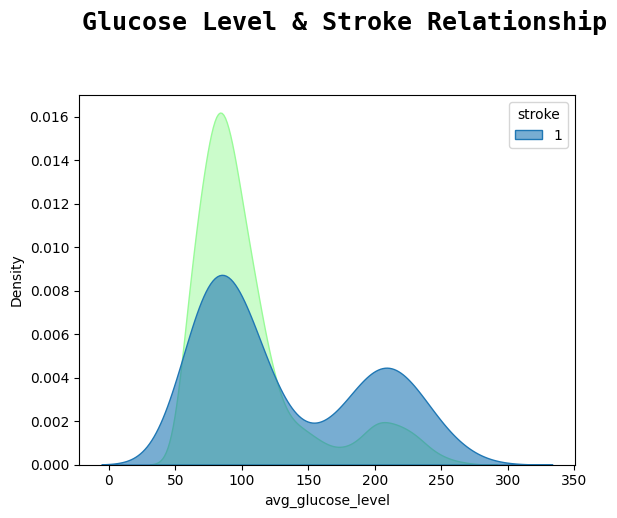

In [17]:
fig1 = plt.figure()
ax2 = fig1.add_subplot(1, 1, 1)
ax2.text(-20,0.020,'Glucose Level & Stroke Relationship',fontsize=18,fontweight='bold', fontfamily='monospace')
sns.kdeplot(data=df[df.stroke==0],x='avg_glucose_level',shade=True,ax = ax2, color='palegreen',alpha=0.5)
sns.kdeplot(data=df[df.stroke==1],x='avg_glucose_level',hue = "stroke",shade=True,ax = ax2,color='Red',alpha=0.6)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\3551881435.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.stroke==0],x='bmi',shade=True,ax = ax3, color='yellow',alpha=0.5)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\3551881435.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.stroke==1],x='bmi',hue = "stroke",shade=True,ax = ax3,color='lightcoral',alpha=0.6)


<Axes: xlabel='bmi', ylabel='Density'>

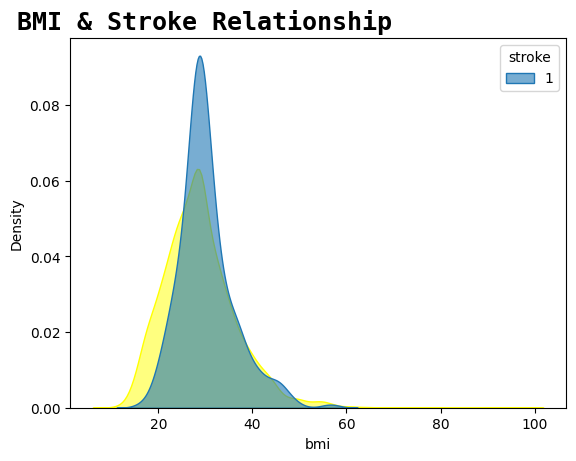

In [18]:
fig1 = plt.figure()
ax3 = fig1.add_subplot(1, 1, 1)
ax3.text(-10,0.10,'BMI & Stroke Relationship',fontsize=18,fontweight='bold', fontfamily='monospace')
sns.kdeplot(data=df[df.stroke==0],x='bmi',shade=True,ax = ax3, color='yellow',alpha=0.5)
sns.kdeplot(data=df[df.stroke==1],x='bmi',hue = "stroke",shade=True,ax = ax3,color='lightcoral',alpha=0.6)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\689229391.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.stroke==0],x='hypertension',shade=True,ax = ax4, color='Purple',alpha=0.5)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\689229391.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.stroke==1],x='hypertension',hue = "stroke",shade=True,ax = ax4,color='lightcoral',alpha=0.6)


Text(0.5, 0.98, 'Hypertension & Stroke Relationship')

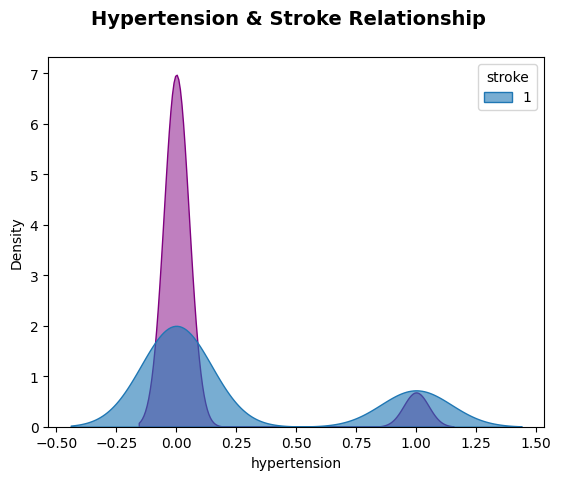

In [19]:
fig1 = plt.figure()
ax4 = fig1.add_subplot(1, 1, 1)
sns.kdeplot(data=df[df.stroke==0],x='hypertension',shade=True,ax = ax4, color='Purple',alpha=0.5)
sns.kdeplot(data=df[df.stroke==1],x='hypertension',hue = "stroke",shade=True,ax = ax4,color='lightcoral',alpha=0.6)
fig1.suptitle('Hypertension & Stroke Relationship', fontsize=14, fontweight='bold')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\2233877620.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.stroke==0],x='heart_disease',shade=True,ax = ax5, color='palegreen',alpha=0.5)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\2233877620.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df.stroke==1],x='heart_disease',hue = "stroke",shade=True,ax = ax5,color='lightcoral',alpha=0.6)


Text(0.5, 0.98, 'Heart Disease & Stroke Relationship')

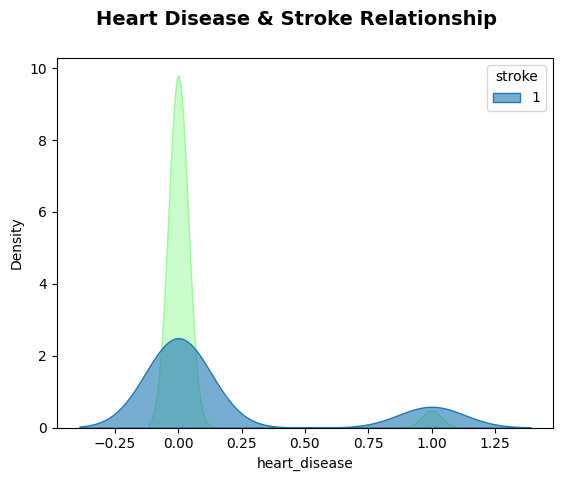

In [20]:
fig5 = plt.figure()
ax5 = fig5.add_subplot(1, 1, 1)
sns.kdeplot(data=df[df.stroke==0],x='heart_disease',shade=True,ax = ax5, color='palegreen',alpha=0.5)
sns.kdeplot(data=df[df.stroke==1],x='heart_disease',hue = "stroke",shade=True,ax = ax5,color='lightcoral',alpha=0.6)
fig5.suptitle('Heart Disease & Stroke Relationship', fontsize=14, fontweight='bold')

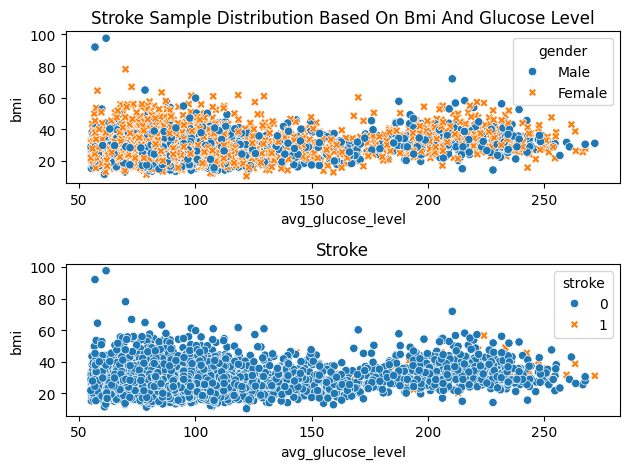

In [21]:
plt.subplot(2,1,1)
plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
ax1 = sns.scatterplot(data=df, x="avg_glucose_level", y="bmi", hue="gender",style="gender")
plt.subplot(2,1,2)
plt.title('Stroke')
ax2 = sns.scatterplot(data=df, x="avg_glucose_level", y="bmi", hue="stroke",style="stroke")
plt.tight_layout()
plt.show()

<Axes: xlabel='hypertension', ylabel='count'>

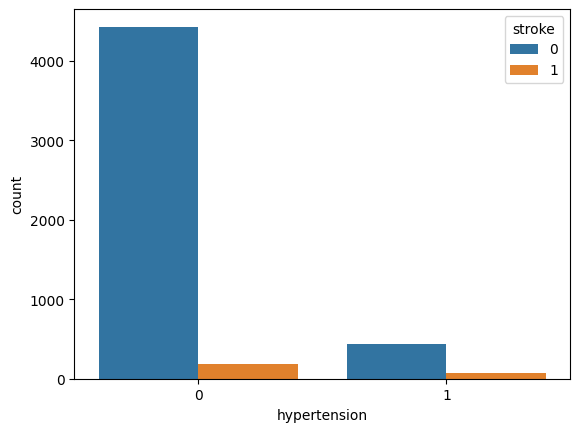

In [22]:
sns.countplot(x = "hypertension", data=df,hue="stroke")

<Axes: xlabel='gender', ylabel='count'>

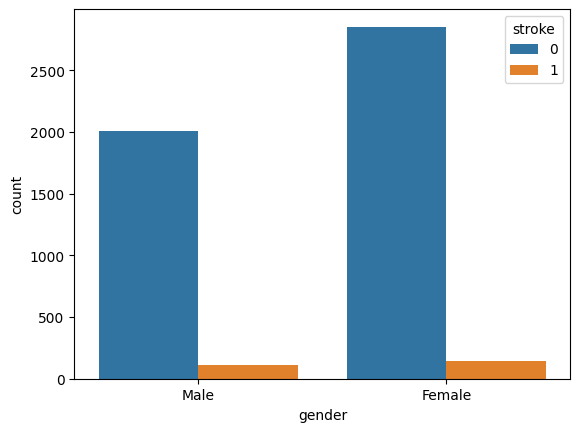

In [23]:
sns.countplot(x = "gender", data=df,hue="stroke")

<Axes: xlabel='heart_disease', ylabel='count'>

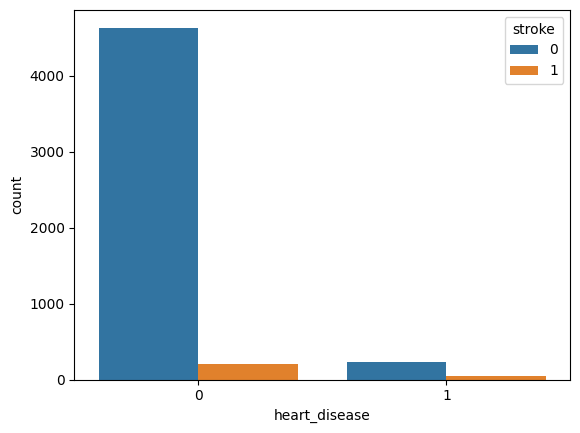

In [24]:
sns.countplot(x = "heart_disease", data=df,hue="stroke")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\3379718317.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(stroke_gen.index, **font_dict)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\3379718317.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Private','Self-Employed','Children', 'Gov-Job','Never worked'], **font_dict)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\3379718317.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(['Never Smoked', 'Unknown','Formaly Smoked' ,'Smokes'], **font_dict)


Text(0.18, 1900, 'Stroke')

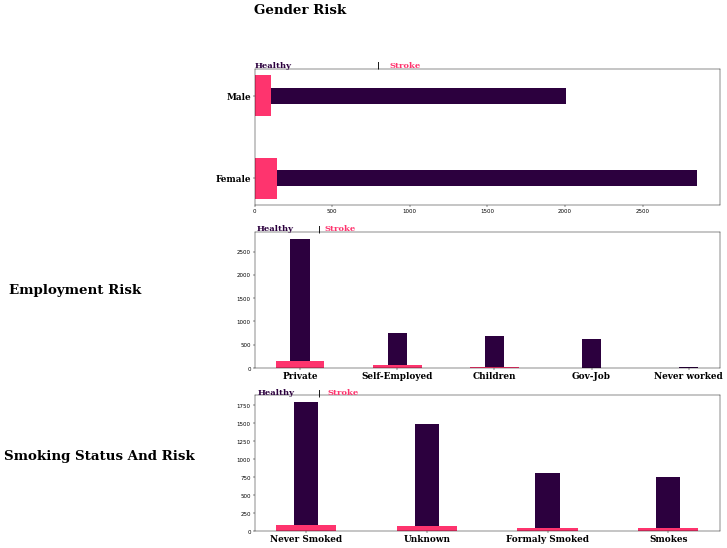

In [25]:
fig = plt.figure(figsize = (15,15),dpi = 40)

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

stroke_col = '#fe346e'
healthy_col = '#2c003e'

title_args = {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}
font_dict = {'size':16, 'family':'Serif', 'color':'black', 'weight':'bold'}
health_dict = {'font':'Serif', 'color': '#2c003e', 'size':15, 'weight':'bold'}
dash_dict = {'font':'Serif', 'color': 'black', 'size':15,'weight':'bold'}
stroke_dict = {'font':'Serif', 'color': '#fe346e', 'size':15,'weight':'bold'}


healthy_gen = df[df['stroke'] == 0].gender.value_counts()
stroke_gen = df[df['stroke'] == 1].gender.value_counts()

ax1.barh( stroke_gen.index , width = healthy_gen.values[0:2], height = 0.2, color = healthy_col)
ax1.barh( np.arange(len(stroke_gen.index)) , width = stroke_gen.values, height = 0.5, color = stroke_col)

ax1.set_yticklabels(stroke_gen.index, **font_dict)
ax1.axes.get_yaxis().set_visible(True)
ax1.axes.get_xaxis().set_visible(True)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.text(-5,2, 'Gender Risk',**title_args)
ax1.text(0,1.35, 'Healthy',**health_dict)
ax1.text(790,1.35, '|',**dash_dict)
ax1.text(870,1.35, 'Stroke',**stroke_dict)


#ax2 : work-type

healthy_gen = df[df['stroke'] == 0].work_type.value_counts()
stroke_gen = df[df['stroke'] == 1].work_type.value_counts()

ax2.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2, color = healthy_col)
ax2.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5, color= stroke_col)
ax2.set_xticklabels(['Private','Self-Employed','Children', 'Gov-Job','Never worked'], **font_dict)


ax2.text(-3,1600, 'Employment Risk',**title_args)
ax2.text(-0.45,2950, 'Healthy',**health_dict)
ax2.text(0.18,2950, '|',**dash_dict)
ax2.text(0.25,2950, 'Stroke',**stroke_dict)


#ax3-smoking

healthy_gen = df[df['stroke'] == 0].smoking_status.value_counts()
stroke_gen = df[df['stroke'] == 1].smoking_status.value_counts()

ax3.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2,color = healthy_col)
ax3.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= stroke_col)
ax3.set_xticklabels(['Never Smoked', 'Unknown','Formaly Smoked' ,'Smokes'], **font_dict)

ax3.text(-2.5,1000, 'Smoking Status And Risk',**title_args)
ax3.text(-0.4,1900, 'Healthy',**health_dict)
ax3.text(0.095,1900, '|',**dash_dict)
ax3.text(0.18,1900, 'Stroke',**stroke_dict)

##### Pivot Tables - Used for better visualizations

In [26]:
from pivottablejs import pivot_ui
pivot_ui(df)

### 4. Prediction Models

`` Converting Categorical data to Numerical to evaluate.``

In [27]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\2126674849.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\2126674849.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\2126674849.py:3: FutureWarning: Downcasting behavior in `replace` is deprecate

#### 4.1 Splitting Data into Training and Testing

In [28]:
X  = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']]
y = df['stroke']

# creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4088, 7)
y_train: (4088,)
X_test: (1022, 7)
y_test: (1022,)


In [29]:
X_test.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi
4688,0,31.0,0,0,1,64.85,23.0
4478,0,40.0,0,0,1,65.29,28.3
3849,1,8.0,0,0,255,74.42,22.5
4355,1,79.0,1,0,1,76.64,19.5
3826,1,75.0,0,0,2,94.77,27.2


### Logistic regression
``Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.``

In [30]:
from sklearn.linear_model import LogisticRegression
lrClassifier = LogisticRegression()
lrClassifier.fit(X_train, y_train)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:

lrClassifier.score(X_train, y_train)

0.9542563600782779

### The K-nearest neighbours
``The K-nearest neighbours (KNN) classifier uses proximity to make classifications or predictions about independent data points. This technique may be used for both classification and regression scenarios and the output will vary. In classification instances, a decision is made based on majority vote, i.e., the class assigned to the new data point is taken to be the one that is most frequently seen in the vicinity of the point. KNN is also known as a lazy learner technique since a model is not learned. Instead, the raw data is stored and used everytime a prediction must be made.``

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knnClassifier = KNeighborsClassifier(10)
knnClassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [33]:
knnClassifier.score(X_train, y_train)

0.9542563600782779

### Support Vector Classifier
``Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane. SVM chooses the extreme points/vectors that help in creating the hyperplane.``

In [34]:
from sklearn.svm import SVC

svClassifier = SVC()
svClassifier.fit(X_train, y_train)

SVC()

In [35]:
svClassifier.score(X_train, y_train)

0.9542563600782779

### Random forest classifier
``The random forest classifier is an improvement over decision tree classifiers. Based on ensemble learning, a random forest classifier contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. In general, a greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.``

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfClassifier = RandomForestClassifier()
rfClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
rfClassifier.score(X_train, y_train)

1.0

### Naive Bayes classifier
``Naive Bayes makes the assumption that the features are independent. This means that we are still assuming class-specific covariance matrices (as in QDA), but the covariance matrices are diagonal matrices. This is due to the assumption that the features are independent. So, given a training dataset of N input variables x with corresponding target variables t, (Gaussian) Naive Bayes assumes that the class-conditional densities are normally distributed.``

In [38]:
from sklearn.naive_bayes import GaussianNB

nbClassifier = GaussianNB()
nbClassifier.fit(X_train, y_train)

GaussianNB()

In [39]:
nbClassifier.score(X_train, y_train)

0.8498043052837574

### Decision Tree classifier
``Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.``

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
dtClassifier.score(X_train, y_train)

1.0

### Gradient Boosting Machines (GBM)
- ``Builds trees sequentially, each correcting errors of the previous one.``
- ``Generally provides better accuracy compared to single decision trees.``
- ``Handles missing data well and is robust to outliers. ``

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier(random_state=42)
gbm_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [43]:
gbm_classifier.score(X_train, y_train)

0.9593933463796478

### XGBoost (Extreme Gradient Boosting)
- ``Advanced implementation of gradient boosting.``
- ``Highly efficient and scalable.``
- ``Automatically handles missing values and is robust to outliers.``

In [44]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [45]:
xgb_classifier.score(X_train, y_train)

0.9958414872798435

### AdaBoost (Adaptive Boosting):
- ``Sequentially corrects the mistakes of the weak classifiers.``
- ``Combines multiple weak classifiers to build a strong classifier.``
- ``Effective in binary classification problems like stroke prediction.``

In [46]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train, y_train)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [47]:
adaboost_classifier.score(X_train, y_train)

0.9540117416829745

### Neural Networks (using TensorFlow and Keras):
- ``Can capture complex non-linear relationships in the data.``
- ``Suitable for large datasets with high-dimensional features.``
- ``Can automatically learn feature representations from the data.``

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the number of features
num_features = X_train.shape[1]  # Number of features is equal to the number of columns in X_train

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9419 - loss: 0.3477
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9550 - loss: 0.2319
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9434 - loss: 0.2078
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9447 - loss: 0.2162
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9486 - loss: 0.2150
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9536 - loss: 0.1963
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9555 - loss: 0.1711
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.9434 - loss: 0.2453
Epoch 9/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9538 - loss: 0.1854
Epoch 10/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9512 - loss: 0.2070


### Performance Analysis of the different models 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9405 - loss: 0.2131  


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15620\4201972139.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Score", data=data_Perf, palette="magma")


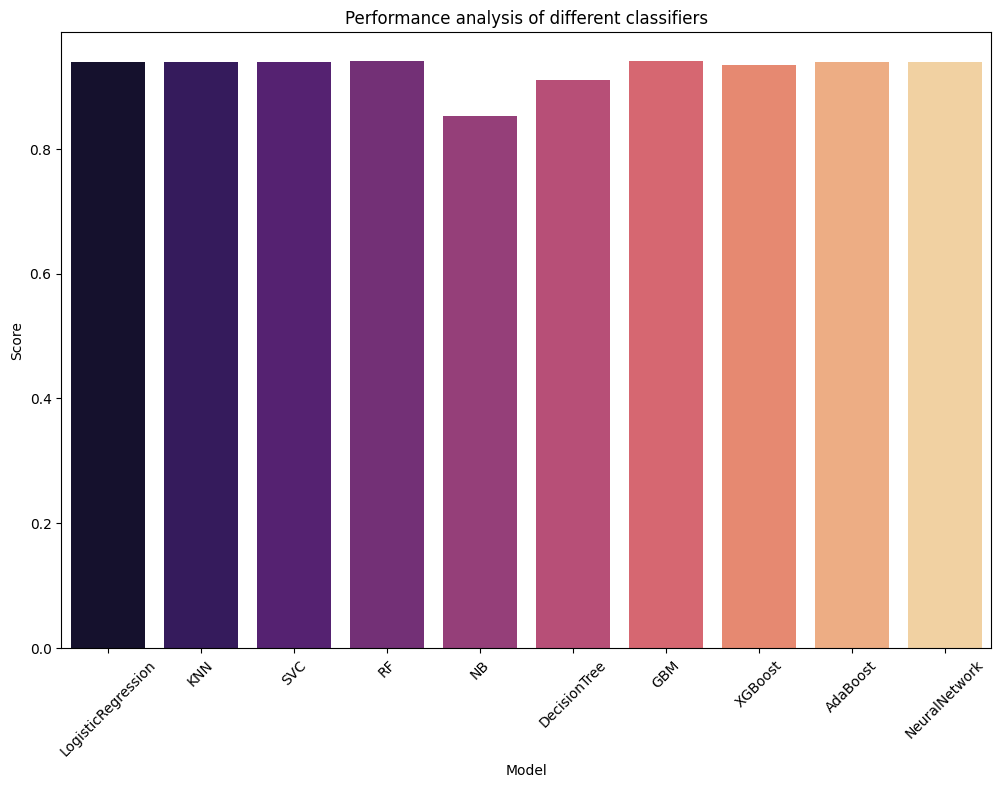

In [49]:
# Calculate scores for the additional algorithms
gbm_score = gbm_classifier.score(X_test, y_test)
xgb_score = xgb_classifier.score(X_test, y_test)
adaboost_score = adaboost_classifier.score(X_test, y_test)
# Assuming you have already trained and tested the neural network model, calculate its score
neural_network_score = model.evaluate(X_test, y_test)[1]  # The second value returned by evaluate() is accuracy

# Add the scores to the DataFrame
data_Perf = pd.DataFrame(data={'Model': ['LogisticRegression', 'KNN', 'SVC', 'RF', 'NB', 'DecisionTree', 'GBM', 'XGBoost', 'AdaBoost', 'NeuralNetwork'],
                                'Score': [lrClassifier.score(X_test, y_test),
                                          knnClassifier.score(X_test, y_test),
                                          svClassifier.score(X_test, y_test),
                                          rfClassifier.score(X_test, y_test),
                                          nbClassifier.score(X_test, y_test),
                                          dtClassifier.score(X_test, y_test),
                                          gbm_classifier.score(X_test, y_test),
                                          xgb_classifier.score(X_test, y_test),
                                          adaboost_classifier.score(X_test, y_test),
                                          neural_network_score]})

# Plot the performance analysis
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Score", data=data_Perf, palette="magma")
plt.title('Performance analysis of different classifiers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [50]:
data_Perf

,Model,Score
0,LogisticRegression,0.939335
1,KNN,0.939335
2,SVC,0.939335
3,RF,0.940313
4,NB,0.853229
5,DecisionTree,0.910959
6,GBM,0.940313
7,XGBoost,0.933464
8,AdaBoost,0.939335
9,NeuralNetwork,0.939335


In [51]:
from sklearn.metrics import accuracy_score

# Get predictions for each model on the test set
pred_lr = lrClassifier.predict(X_test)
pred_svm = svClassifier.predict(X_test)
pred_knn = knnClassifier.predict(X_test)
pred_nb = nbClassifier.predict(X_test)
pred_dt = dtClassifier.predict(X_test)
pred_rf = rfClassifier.predict(X_test)
pred_gbm = gbm_classifier.predict(X_test)
pred_xgb = xgb_classifier.predict(X_test)
pred_adaboost = adaboost_classifier.predict(X_test)
# Assuming you have already trained and tested the neural network model, get its predictions
pred_neural_network = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Calculate accuracy for each model
accuracy_lr = accuracy_score(y_test, pred_lr)
accuracy_svm = accuracy_score(y_test, pred_svm)
accuracy_knn = accuracy_score(y_test, pred_knn)
accuracy_nb = accuracy_score(y_test, pred_nb)
accuracy_dt = accuracy_score(y_test, pred_dt)
accuracy_rf = accuracy_score(y_test, pred_rf)
accuracy_gbm = accuracy_score(y_test, pred_gbm)
accuracy_xgb = accuracy_score(y_test, pred_xgb)
accuracy_adaboost = accuracy_score(y_test, pred_adaboost)
accuracy_neural_network = accuracy_score(y_test, pred_neural_network)

# Create a DataFrame to store accuracy scores
accuracy_report = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting Machines', 'XGBoost', 'AdaBoost', 'Neural Network'],
    'Accuracy': [accuracy_lr, accuracy_svm, accuracy_knn, accuracy_nb, accuracy_dt, accuracy_rf, accuracy_gbm, accuracy_xgb, accuracy_adaboost, accuracy_neural_network]
})

# Print the accuracy report
accuracy_report


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Model,Accuracy
0,Logistic Regression,0.939335
1,Support Vector Machine,0.939335
2,K-Nearest Neighbors,0.939335
3,Naive Bayes,0.853229
4,Decision Tree,0.910959
5,Random Forest,0.940313
6,Gradient Boosting Machines,0.940313
7,XGBoost,0.933464
8,AdaBoost,0.939335
9,Neural Network,0.939335


### Conclusion:
- 1. **Consistency of Performance :** Several models, including Logistic Regression, Support Vector Machine, K-Nearest Neighbors, AdaBoost, and Neural Network, exhibit similar accuracies around 93-94%. This suggests that these models are consistently performing well on the given dataset.
- 2. **Ensemble Methods Outperforming :** Ensemble methods such as Random Forest, Gradient Boosting Machines, and AdaBoost demonstrate slightly higher accuracies compared to individual models like Decision Tree and Naive Bayes. This underscores the effectiveness of ensemble techniques in improving predictive performance.
- 3. **Potential Overfitting :** While the accuracies are relatively high across models, further evaluation, such as examining precision, recall, and F1-score, is necessary to assess the models' generalization performance. Additionally, models like Decision Tree and Naive Bayes exhibit lower accuracy, indicating potential overfitting or underperformance on the test set compared to other models.

In [52]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,0,1,228.69,36.600000,formerly smoked,1
1,1,61.0,0,0,Yes,1,0,202.21,28.893237,never smoked,1
2,0,80.0,0,1,Yes,0,0,105.92,32.500000,never smoked,1
3,1,49.0,0,0,Yes,0,1,171.23,34.400000,smokes,1
4,1,79.0,1,0,Yes,1,0,174.12,24.000000,never smoked,1


In [54]:
import joblib
import os

# Directory to save the models
model_dir = "saved_models"
os.makedirs(model_dir, exist_ok=True)

# Save models using joblib
joblib.dump(lrClassifier, os.path.join(model_dir, 'logistic_regression_model.pkl'))
joblib.dump(svClassifier, os.path.join(model_dir, 'svm_model.pkl'))
joblib.dump(knnClassifier, os.path.join(model_dir, 'knn_model.pkl'))
joblib.dump(nbClassifier, os.path.join(model_dir, 'naive_bayes_model.pkl'))
joblib.dump(dtClassifier, os.path.join(model_dir, 'decision_tree_model.pkl'))
joblib.dump(rfClassifier, os.path.join(model_dir, 'random_forest_model.pkl'))
joblib.dump(gbm_classifier, os.path.join(model_dir, 'gbm_model.pkl'))
joblib.dump(xgb_classifier, os.path.join(model_dir, 'xgb_model.pkl'))
joblib.dump(adaboost_classifier, os.path.join(model_dir, 'adaboost_model.pkl'))

# To load the models back
lrClassifier = joblib.load(os.path.join(model_dir, 'logistic_regression_model.pkl'))
svClassifier = joblib.load(os.path.join(model_dir, 'svm_model.pkl'))
knnClassifier = joblib.load(os.path.join(model_dir, 'knn_model.pkl'))
nbClassifier = joblib.load(os.path.join(model_dir, 'naive_bayes_model.pkl'))
dtClassifier = joblib.load(os.path.join(model_dir, 'decision_tree_model.pkl'))
rfClassifier = joblib.load(os.path.join(model_dir, 'random_forest_model.pkl'))
gbm_classifier = joblib.load(os.path.join(model_dir, 'gbm_model.pkl'))
xgb_classifier = joblib.load(os.path.join(model_dir, 'xgb_model.pkl'))
adaboost_classifier = joblib.load(os.path.join(model_dir, 'adaboost_model.pkl'))

In [56]:
from sklearn.model_selection import cross_val_score
models = {
    'Logistic Regression': lrClassifier,
    'Support Vector Machine': svClassifier,
    'K-Nearest Neighbors': knnClassifier,
    'Naive Bayes': nbClassifier,
    'Decision Tree': dtClassifier,
    'Random Forest': rfClassifier,
    'Gradient Boosting Machines': gbm_classifier,
    'XGBoost': xgb_classifier,
    'AdaBoost': adaboost_classifier,
}
cv_results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy') 
    cv_results[model_name] = cv_scores.mean()
cv_report = pd.DataFrame(cv_results.items(), columns=['Model', 'Cross-Validation Accuracy'])
print(cv_report)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

                        Model  Cross-Validation Accuracy
0         Logistic Regression                   0.937384
1      Support Vector Machine                   0.939340
2         K-Nearest Neighbors                   0.934438
3                 Naive Bayes                   0.637948
4               Decision Tree                   0.891396
5               Random Forest                   0.936399
6  Gradient Boosting Machines                   0.931516
7                     XGBoost                   0.926624
8                    AdaBoost                   0.928580


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
